In [132]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [133]:
# Paths
cwd = os.path.join("..","..")
cwd_Images_Raw = os.path.join(cwd, "Sentinel-2 Images Raw")
cwd_Images_Processed = os.path.join(cwd, "Sentinel-2 Images Processed")
cwd_Images_Results = os.path.join(cwd, "Results")

In [134]:
df = pd.read_excel(os.path.join(cwd,"Results","Final (101 Sites) HI, Roman, Info.xlsx"), header=1)
df.head()

,Site,HI 100,HI 300,HI 600,HI 900,HI Total,STD 100,Mean 100,CV 100,Sill 100,...,Sill 300,STD 600,Mean 600,CV 600,Sill 600,STD 900,Mean 900,CV 900,Sill 900,Variogram Fitting
0,GHNA,0.000000,0.000000,0.000000,0.000000,0.000000,0.280386,5.898007,0.047539,0.083282,...,0.090163,0.339874,5.938954,0.057228,0.114099,0.394323,5.943672,0.066343,0.150287,Good
1,KEN-KAP,0.000009,0.000054,0.000108,0.000073,0.000061,0.512046,13.112819,0.039049,0.256761,...,1.281788,1.284793,12.376468,0.103809,2.017366,1.313768,12.549636,0.104686,1.849329,Bad
2,AT-Mmg,0.000256,0.000093,0.000121,0.000133,0.000151,1.886267,31.809015,0.059300,3.316349,...,3.442307,1.914285,32.875859,0.058228,3.904039,2.187106,33.644299,0.065007,5.146960,Bad
3,Dahara (Senegal),0.000401,0.000117,0.000131,0.000094,0.000186,1.534155,12.907167,0.118861,2.613929,...,2.156830,1.451705,12.376944,0.117291,2.143269,1.450054,12.104871,0.119791,2.072566,Bad
4,SE-Svb,0.000637,0.000158,0.000393,0.000642,0.000458,2.092156,21.727341,0.096291,5.042184,...,3.705230,2.525609,22.287381,0.113320,6.435816,3.372941,23.119932,0.145889,10.917600,Good


In [135]:
df_100 = df[['Site','CV 100','Sill 100','Variogram Fitting']]
df_100.columns = ['Site','CV','Sill','Variogram Fitting']
df_300 = df[['Site','CV 300','Sill 300','Variogram Fitting']]
df_300.columns = ['Site','CV','Sill','Variogram Fitting']
df_600 = df[['Site','CV 600','Sill 600','Variogram Fitting']]
df_600.columns = ['Site','CV','Sill','Variogram Fitting']
df_900 = df[['Site','CV 900','Sill 900','Variogram Fitting']]
df_900.columns = ['Site','CV','Sill','Variogram Fitting']
df_100_good = df_100[df_100['Variogram Fitting'] == 'Good']
df_300_good = df_300[df_300['Variogram Fitting'] == 'Good']
df_600_good = df_600[df_600['Variogram Fitting'] == 'Good']
df_900_good = df_900[df_900['Variogram Fitting'] == 'Good']
df_100.head()

,Site,CV,Sill,Variogram Fitting
0,GHNA,0.047539,0.083282,Good
1,KEN-KAP,0.039049,0.256761,Bad
2,AT-Mmg,0.059300,3.316349,Bad
3,Dahara (Senegal),0.118861,2.613929,Bad
4,SE-Svb,0.096291,5.042184,Good


In [136]:
list_ROI = [100,300,600,900]
list_df = [df_100,df_300,df_600,df_900]
list_df_good = [df_100_good,df_300_good,df_600_good,df_900_good]

In [137]:
# CV Distribution
for i in range(len(list_df)):
    # CV > 1 --> CV = 1
    list_df[i]['CV'] = list_df[i]['CV'].apply(lambda x: 1 if x >1 else x)

    # Set the style for Seaborn
    sns.set_theme(style="whitegrid")

    # Create a histogram with specific bin edges
    bin_edges = np.linspace(0, 1, 11)  # Define bin edges (e.g., 10 bins)

    # Plot histogram with custom bin edges
    plt.figure(figsize=(8, 6))
    sns.histplot(list_df[i]['CV'], bins=bin_edges, kde=True, color='skyblue', edgecolor='black')

    # Add grid
    plt.grid(True, axis='x', linestyle='--', color='gray')

    # Set x-ticks to correspond to bin edges
    plt.xticks(bin_edges)

    # Add labels and title
    plt.title(f'Distribution of CV of ROI {list_ROI[i]}', fontsize=16)
    plt.xlabel('Value', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)

    plt.savefig(os.path.join(cwd_Images_Results,"Plots","CV Distribution",f"{list_ROI[i]} CV Distribution.png"))
    plt.clf()

C:\Users\m1865\AppData\Local\Temp\ipykernel_8644\4073437299.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  list_df[i]['CV'] = list_df[i]['CV'].apply(lambda x: 1 if x >1 else x)
C:\Users\m1865\AppData\Local\Temp\ipykernel_8644\4073437299.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  list_df[i]['CV'] = list_df[i]['CV'].apply(lambda x: 1 if x >1 else x)
C:\Users\m1865\AppData\Local\Temp\ipykernel_8644\4073437299.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

In [138]:
# Sill Distribution
for i in range(len(list_df_good)):

    # Set the style for Seaborn
    sns.set_theme(style="whitegrid")

    # Create a histogram with specific bin edges
    bin_edges = np.linspace(0, round(np.max(list_df[i]['Sill']) / 50) * 50, 11)  # Define bin edges (e.g., 10 bins)

    # Plot histogram with custom bin edges
    plt.figure(figsize=(8, 6))
    sns.histplot(list_df[i]['Sill'], bins=bin_edges, kde=True, color='skyblue', edgecolor='black')

    # Add grid
    plt.grid(True, axis='x', linestyle='--', color='gray')

    # Set x-ticks to correspond to bin edges
    plt.xticks(bin_edges)

    # Add labels and title
    plt.title(f'Distribution of Sill of ROI {list_ROI[i]}', fontsize=16)
    plt.xlabel('Value', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)

    plt.savefig(os.path.join(cwd_Images_Results,"Plots","Sill Distribution",f"{list_ROI[i]} Sill Distribution.png"))
    plt.clf()

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

In [121]:
df_vario = pd.read_csv(os.path.join(cwd,"Results","Variogram.csv"))
df_vario.head()

,Site,Distance,STD,CV,Range,Sill,Nugget
0,ATGE,30,10.292980,0.256794,20.000000,71.762211,3.570080e+01
1,ATGE,100,15.866641,0.478179,70.000000,267.887789,5.104219e-14
2,ATGE,300,20.748732,0.428943,104.664412,449.836840,6.333086e+01
3,ATGE,600,21.184529,0.505233,227.522937,453.765630,9.937431e+01
4,ATGE,900,20.035755,0.502820,345.097181,438.814722,1.064037e+02


Text(0, 0.5, 'Frequency')

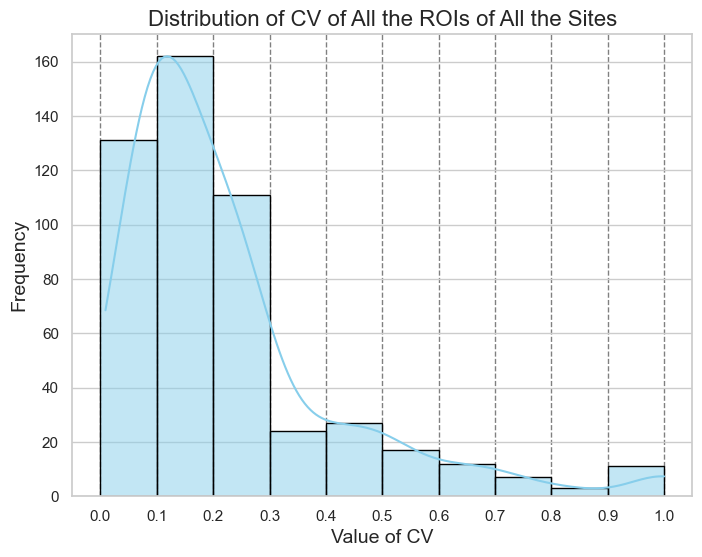

In [122]:
# CV Distribution of all
df_vario_temp = df_vario.copy()

# CV > 1 --> CV = 1
df_vario_temp['CV'] = df_vario_temp['CV'].apply(lambda x: 1 if x >1 else x)

# Set the style for Seaborn
sns.set_theme(style="whitegrid")

# Create a histogram with specific bin edges
bin_edges = np.linspace(0, 1, 11)  # Define bin edges (e.g., 10 bins)

# Plot histogram with custom bin edges
plt.figure(figsize=(8, 6))
sns.histplot(df_vario_temp['CV'], bins=bin_edges, kde=True, color='skyblue', edgecolor='black')

# Add grid
plt.grid(True, axis='x', linestyle='--', color='gray')

# Set x-ticks to correspond to bin edges
plt.xticks(bin_edges)

# Add labels and title
plt.title(f'Distribution of CV of All the ROIs of All the Sites', fontsize=16)
plt.xlabel('Value of CV', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

In [123]:
df_fitting = pd.read_excel(os.path.join(cwd_Images_Results,"Variogram - Fitting Results.xlsx"))
df_fitting_good = df_fitting[df_fitting['Variogram Fitting'] == 'Good']
df_fitting_good.head()

,Number,Site,Latitude,Longitude,Main Ecosystem,FLOX Activity,Reference Network,Variogram Fitting
0,1.0,ATGE,52.466778,12.959778,NaN,NaN,HYPERNET,Good
5,5.0,BASP,39.049139,-2.075917,NaN,NaN,HYPERNET,Good
6,6.0,BE-Bra,51.307600,4.519900,Evergreen Forest,Yes,FLOX-ICOS,Good
7,7.0,BE-Maa,50.979870,5.631851,NaN,NaN,ICOS,Good
8,8.0,BE-Vie,50.304962,5.998099,NaN,NaN,ICOS,Good


In [124]:
df_vario_good = pd.merge(df_fitting_good, df_vario, on='Site', how='inner')
df_vario_good.head()

,Number,Site,Latitude,Longitude,Main Ecosystem,FLOX Activity,Reference Network,Variogram Fitting,Distance,STD,CV,Range,Sill,Nugget
0,1.0,ATGE,52.466778,12.959778,NaN,NaN,HYPERNET,Good,30,10.292980,0.256794,20.000000,71.762211,3.570080e+01
1,1.0,ATGE,52.466778,12.959778,NaN,NaN,HYPERNET,Good,100,15.866641,0.478179,70.000000,267.887789,5.104219e-14
2,1.0,ATGE,52.466778,12.959778,NaN,NaN,HYPERNET,Good,300,20.748732,0.428943,104.664412,449.836840,6.333086e+01
3,1.0,ATGE,52.466778,12.959778,NaN,NaN,HYPERNET,Good,600,21.184529,0.505233,227.522937,453.765630,9.937431e+01
4,1.0,ATGE,52.466778,12.959778,NaN,NaN,HYPERNET,Good,900,20.035755,0.502820,345.097181,438.814722,1.064037e+02


Text(0, 0.5, 'Frequency')

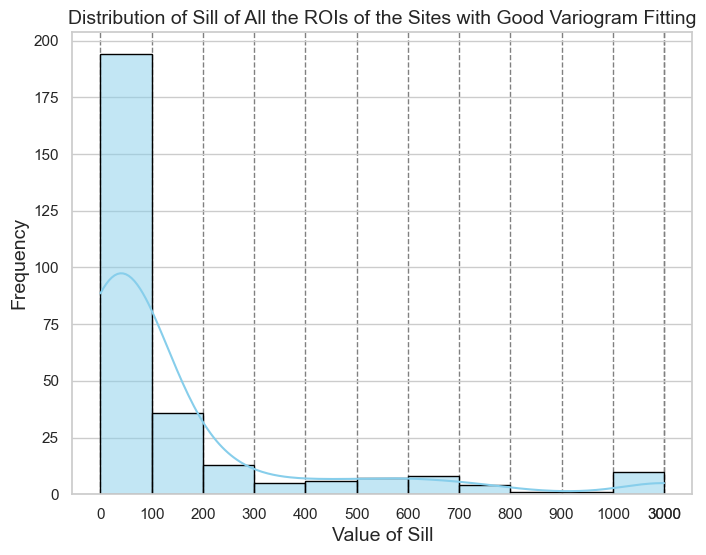

In [127]:
# CV > 1 --> CV = 1
df_vario_good_temp = df_vario_good.copy()
df_vario_good_temp['Sill'] = df_vario_good_temp['Sill'].apply(lambda x: 1100 if x >1000 else x)

# Set the style for Seaborn
sns.set_theme(style="whitegrid")

# Create a histogram with specific bin edges
bin_edges = np.linspace(0, 1100, 12)  # Define bin edges (e.g., 10 bins)

# Plot histogram with custom bin edges
plt.figure(figsize=(8, 6))
sns.histplot(df_vario_good_temp['Sill'], bins=bin_edges, kde=True, color='skyblue', edgecolor='black')

# Add grid
plt.grid(True, axis='x', linestyle='--', color='gray')

# Set x-ticks to correspond to bin edges
# plt.xticks(bin_edges)
plt.xticks(list(bin_edges) + [1100], labels=list(map(int, bin_edges)) + ['3000'])

# Add labels and title
plt.title(f'Distribution of Sill of All the ROIs of the Sites with Good Variogram Fitting', fontsize=14)
plt.xlabel('Value of Sill', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

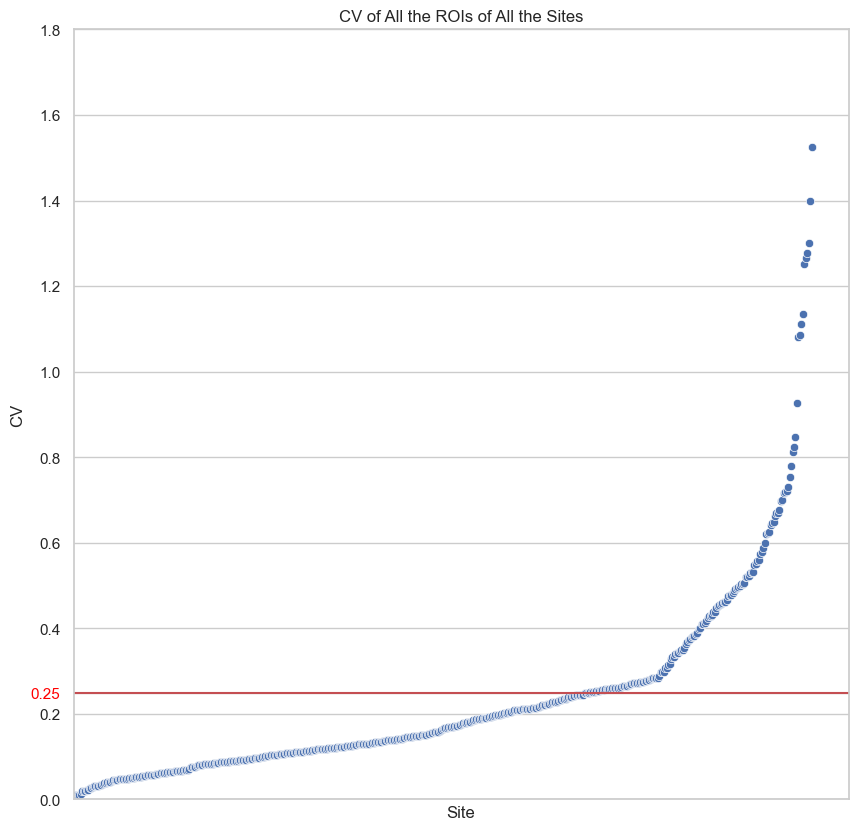

In [146]:
df_vario_temp2 = df_vario.copy()
df_vario_temp2 = df_vario_temp2.sort_values('CV', ascending = True)

fig, ax = plt.subplots(figsize = (10,10))
plt.title("CV of All the ROIs of All the Sites")
sns.scatterplot(data=df_vario_temp2, x=np.arange(len(df_vario_temp2['CV'])), y="CV")
plt.axhline(y=0.25, color='r', linestyle='-')
plt.xticks([])
plt.yticks(list(plt.yticks()[0]) + [0.25], labels=list(plt.yticks()[1]) + ['0.25'])
plt.xlim(0)
plt.ylim(0)
plt.xlabel('Site')
ax.yaxis.get_ticklabels()[-1].set_color('red')

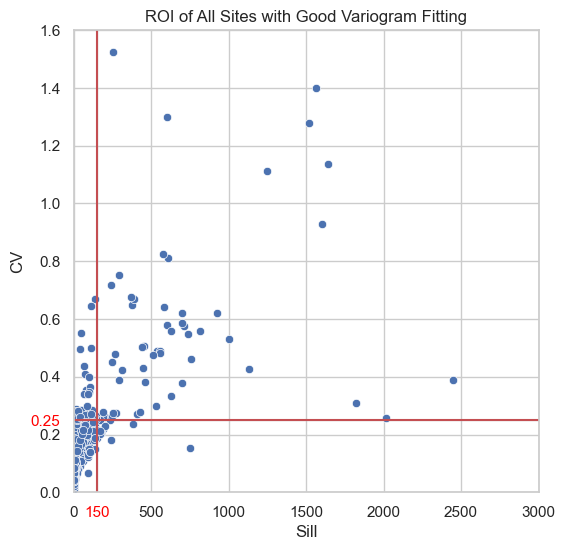

In [131]:
# Scatterplot - Sill / CV
fig, ax = plt.subplots(figsize = (6,6))
plt.title("ROI of All Sites with Good Variogram Fitting")
sns.scatterplot(data=df_vario_good, x="Sill", y="CV")
plt.axhline(y=0.25, color='r', linestyle='-')
plt.axvline(x=150, color='r', linestyle='-')
plt.xticks(list(plt.xticks()[0]) + [150], labels=list(plt.xticks()[1]) + ['150'])
plt.yticks(list(plt.yticks()[0]) + [0.25], labels=list(plt.yticks()[1]) + ['0.25'])
plt.xlim(0)
plt.ylim(0)
ax.xaxis.get_ticklabels()[-1].set_color('red')
ax.yaxis.get_ticklabels()[-1].set_color('red')